In [1]:
# https://www.tensorflow.org/tutorials/images/classification

# essentially, use the keras dataloader to read in files, which will 
# also automatically deal with folder labels, splitting (train/val/test)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
print(tf.version.VERSION)

import os
import pathlib

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = '../sample_data/mini-arabic-package/'
data_dir = pathlib.Path(data_dir)

2.10.0


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9556


In [6]:
folder_path = '../sample_data/mini-arabic-package/'

In [7]:
folders = os.listdir(folder_path)
folders[0]

'الأرانب'

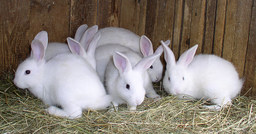

In [8]:
PIL.Image.open(f'{folder_path}{folders[0]}/01.jpg')

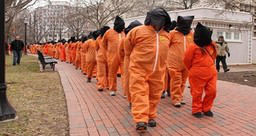

In [9]:
PIL.Image.open(f'{folder_path}{folders[1]}/01.jpg')

## neural network

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [62]:
# 70 % training / 20 % val / 10 % test ??
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  #image_size=(img_height, img_width), # image resized at the model stage
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  #image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9556 files belonging to 9813 classes.
Using 6690 files for training.
Found 9556 files belonging to 9813 classes.
Using 2866 files for validation.


In [35]:
## splitting into train/val/test

"""

X_train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

X_val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="both",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
"""

'\n\nX_train_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.3,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n\nX_val_ds = tf.keras.utils.image_dataset_from_directory(\n  data_dir,\n  validation_split=0.5,\n  subset="both",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n'

In [17]:
class_names = train_ds.class_names
#print(class_names)

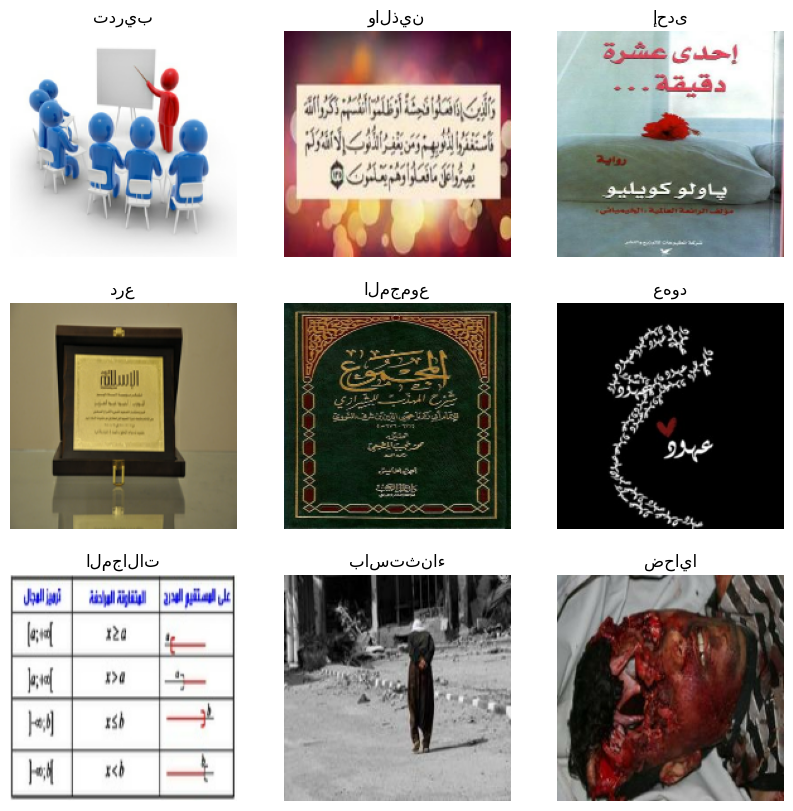

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [63]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

In [64]:
# simple CNN with resize layer followed by rescaling in the second layer
# 
model = Sequential([
    layers.Resizing(height=img_height, width=img_width, 
                    input_shape=(None, None, 3)
                   ),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3) ), 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
#model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_6 (Resizing)       (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [67]:
epochs=2
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs )

Epoch 1/2
210/210 [==============================] - 177s 812ms/step - loss: 9.2186 - accuracy: 0.0000e+00 - val_loss: 9.2677 - val_accuracy: 0.0000e+00
Epoch 2/2
210/210 [==============================] - 168s 800ms/step - loss: 9.1378 - accuracy: 0.0000e+00 - val_loss: 9.4085 - val_accuracy: 0.0000e+00


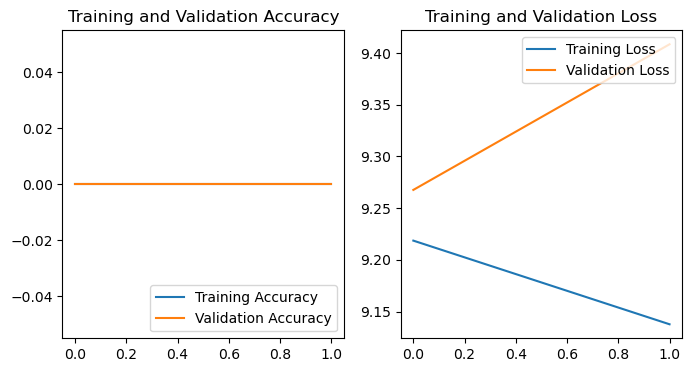

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()